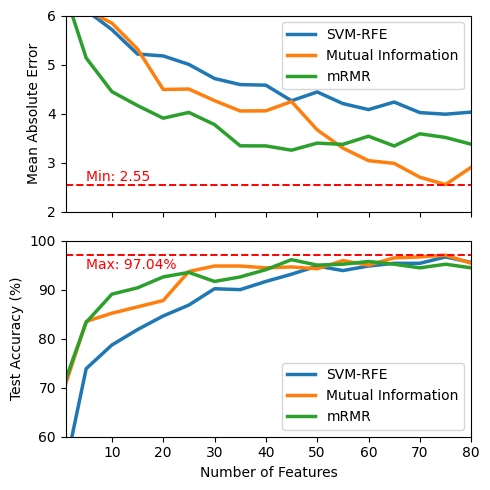

In [1]:
import matplotlib.pyplot as plt
import pickle

def load_from_pkl(file_path):
    with open(file_path, 'rb') as file:
        return pickle.load(file)

model_name_clusters = 'Regression'
filenames_clusters = ['/mnt/d/sharegit/MasterThesis_data/' + model_name_clusters + '/svm_rfe_reg_results.pkl',
                      '/mnt/d/sharegit/MasterThesis_data/' + model_name_clusters + '/mutual_info_reg_results.pkl',
                      '/mnt/d/sharegit/MasterThesis_data/' + model_name_clusters + '/mrmr_reg_results.pkl']

feature_methods_clusters = ['SVM-RFE', 'Mutual Information', 'mRMR']
models_clusters = ['MLP', 'MLP', 'MLP']
metric_clusters = 'test_neg_mean_absolute_error'
test_neg_mean_absolute_error = 2.55

model_name_regression = 'Clusters'
filenames_regression = ['/mnt/d/sharegit/MasterThesis_data/' + model_name_regression + '/svm_rfe_results.pkl',
                        '/mnt/d/sharegit/MasterThesis_data/' + model_name_regression + '/mutual_info_results.pkl',
                        '/mnt/d/sharegit/MasterThesis_data/' + model_name_regression + '/mrmr_results.pkl']

feature_methods_regression = ['SVM-RFE', 'Mutual Information', 'mRMR']
model_regression = 'RF'
metric_regression = 'test_accuracy'
max_accuracy = 97.04

fig, axs = plt.subplots(2, 1, figsize=(5, 5), sharex=True)


# Subplot for Clusters
for filename, method, model in zip(filenames_clusters, feature_methods_clusters, models_clusters):
    loaded_results = load_from_pkl(filename)
    feature_counts = [result['features'] for result in loaded_results if result['name'] == model]
    test_accuracies = [result[metric_clusters] for result in loaded_results if result['name'] == model]
    axs[0].plot(feature_counts, test_accuracies, label=method, linewidth=2.5)

#axs[0].set_xlabel('Number of Features')
axs[0].set_ylabel("mean absolute error".title())
#axs[0].set_title('Feature Selection Methods Comparison for ' + model_name_clusters)
axs[0].legend()
axs[0].set_ylim((2, 6))
axs[0].set_xlim((1, 80))
axs[0].grid(False)
axs[0].axhline(y=test_neg_mean_absolute_error, color='r', linestyle='--', linewidth=1.4)
axs[0].text(5, test_neg_mean_absolute_error * 1.06, f'Min: {test_neg_mean_absolute_error}', color='r', va='center', ha='left', fontsize=10)
#axs[0].grid(alpha=.4)

# make these tick labels invisible
# Subplot for Regression
for filename, method in zip(filenames_regression, feature_methods_regression):
    loaded_results = load_from_pkl(filename)
    feature_counts = [result['features'] for result in loaded_results if result['name'] == model_regression]
    test_accuracies = [result[metric_regression] for result in loaded_results if result['name'] == model_regression]
    axs[1].plot(feature_counts, test_accuracies, label=method, linewidth=2.5)

axs[1].set_xlabel('Number of Features')
axs[1].set_ylabel(metric_regression.replace('_', ' ').title() + ' (%)')
#axs[1].set_title('Feature Selection Methods Comparison for Clustering using' + model_regression)
axs[1].legend()
axs[1].set_ylim((60, 100))
axs[1].set_xlim((1, 80))
axs[1].grid(False)
axs[1].axhline(y=max_accuracy, color='r', linestyle='--', linewidth=1.4)
axs[1].text(5, max_accuracy * 0.98, f'Max: {max_accuracy}%', color='r', va='center', ha='left', fontsize=10)
#axs[1].grid(alpha=.4)

plt.tight_layout()
plt.savefig(fname = '/mnt/d/sharegit/MasterThesis_data/' + model_name_regression + '/FeaturevsAccMAE.png')
plt.show()



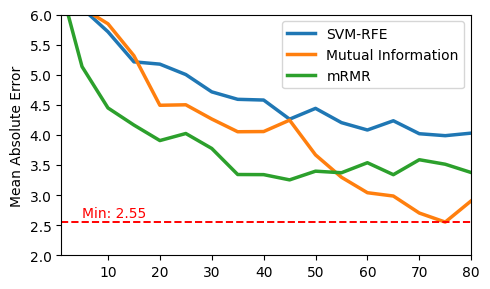

In [3]:
import matplotlib.pyplot as plt
import pickle

def load_from_pkl(file_path):
    with open(file_path, 'rb') as file:
        return pickle.load(file)

model_name_clusters = 'Regression'
filenames_clusters = ['/mnt/d/sharegit/MasterThesis_data/' + model_name_clusters + '/svm_rfe_reg_results.pkl',
                      '/mnt/d/sharegit/MasterThesis_data/' + model_name_clusters + '/mutual_info_reg_results.pkl',
                      '/mnt/d/sharegit/MasterThesis_data/' + model_name_clusters + '/mrmr_reg_results.pkl']

feature_methods_clusters = ['SVM-RFE', 'Mutual Information', 'mRMR']
models_clusters = ['MLP', 'MLP', 'MLP']
metric_clusters = 'test_neg_mean_absolute_error'
test_neg_mean_absolute_error = 2.55

fig, ax = plt.subplots(figsize=(5, 3))

# Subplot for Clusters
for filename, method, model in zip(filenames_clusters, feature_methods_clusters, models_clusters):
    loaded_results = load_from_pkl(filename)
    feature_counts = [result['features'] for result in loaded_results if result['name'] == model]
    test_accuracies = [result[metric_clusters] for result in loaded_results if result['name'] == model]
    ax.plot(feature_counts, test_accuracies, label=method, linewidth=2.5)

ax.set_ylabel("Mean Absolute Error".title())
ax.legend()
ax.set_ylim((2, 6))
ax.set_xlim((1, 80))
ax.grid(False)
ax.axhline(y=test_neg_mean_absolute_error, color='r', linestyle='--', linewidth=1.4)
ax.text(5, test_neg_mean_absolute_error * 1.06, f'Min: {test_neg_mean_absolute_error}', color='r', va='center', ha='left', fontsize=10)

plt.tight_layout()
plt.savefig(fname='/mnt/d/sharegit/MasterThesis_data/Clusters/FeaturevsMAE.png')
plt.show()
